In [20]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
purple_color=(147/255,103/255,153/255)

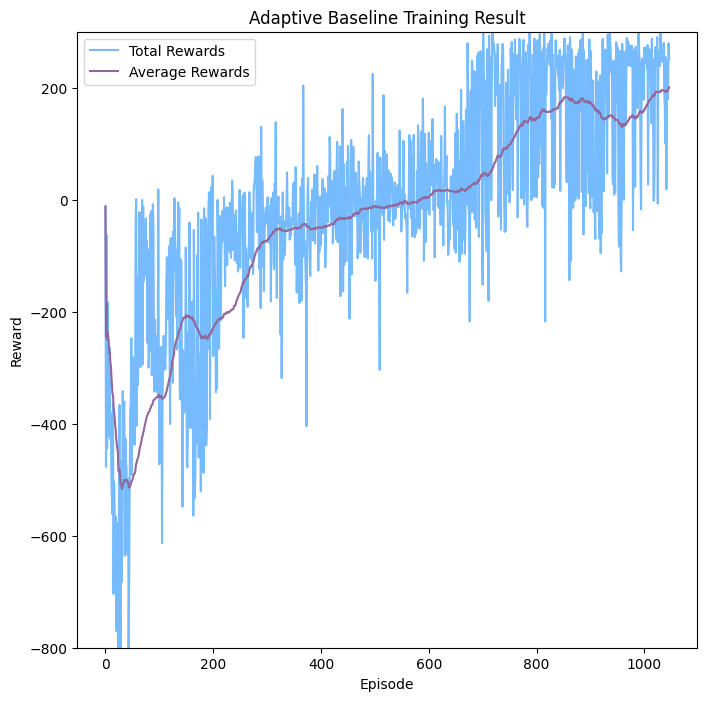

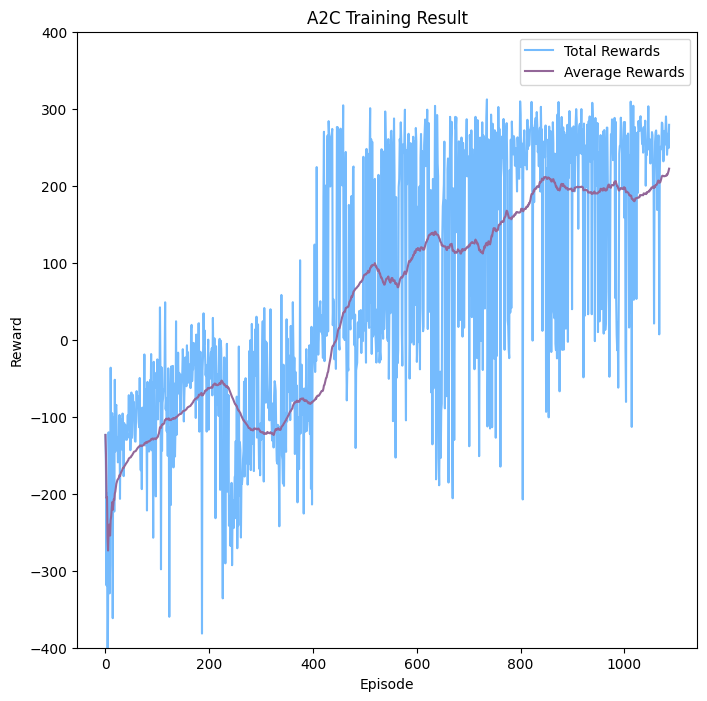

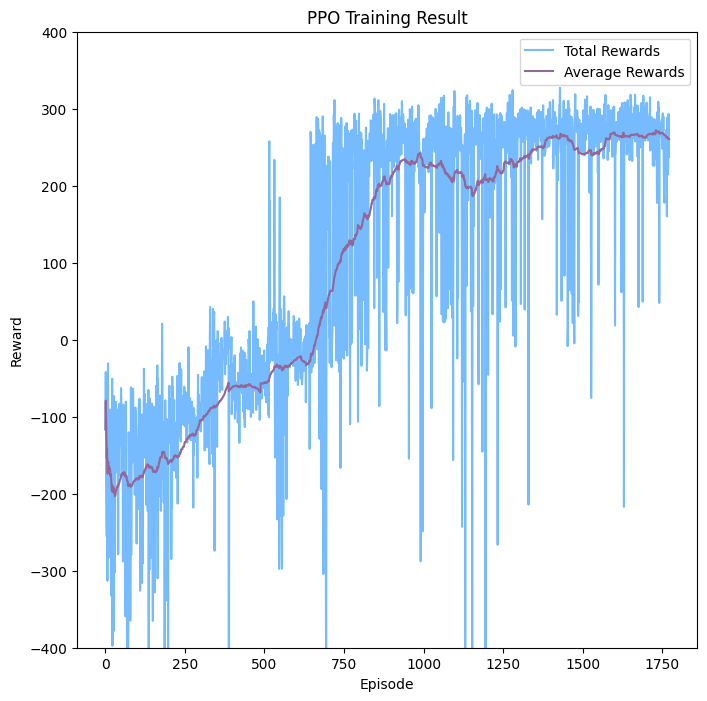

In [39]:
def draw_plot(train_data,title):
    with open(train_data, 'rb') as f:
        data = pickle.load(f)
        total_rewards = data['total_rewards']
        final_rewards = data['final_rewards']
        if title=="Adaptive Baseline":
            moving_average_rewards = data['average_rewards']
        else:
            moving_average_rewards = data['moving_average_rewards']
    plt.figure(figsize=(8,8))

    plt.title(title + " Training Result")
    plt.plot(total_rewards, label='Total Rewards',color='xkcd:sky blue')
    plt.plot(moving_average_rewards, color=purple_color, label='Average Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    if title=="Adaptive Baseline":
        plt.ylim(-800, 300)
    else:
        plt.ylim(-400, 400)
    plt.legend()
    plt.show()
# draw_plot('./Policy baseline/fix_random_train_data.pkl')
draw_plot('./Policy baseline/luck_draw_train_data.pkl','Adaptive Baseline')
draw_plot('./actor critique/A2C.pkl', 'A2C')
draw_plot('./PPO/PPO_Result_2.pkl', 'PPO')



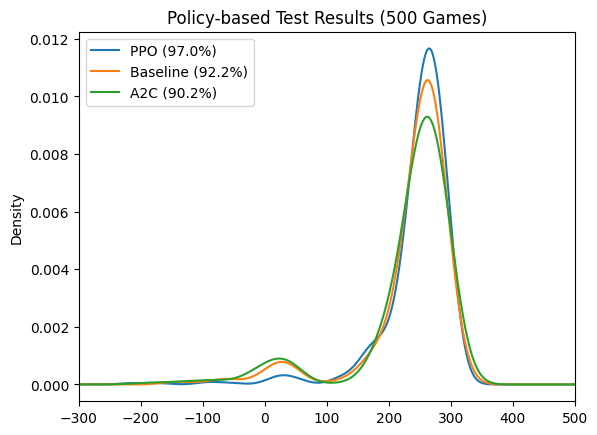

In [40]:
plt.xlim([-300, 500])  # Set the range of the x-axis

with open('./PPO/PPO_Result_2.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['test_total_rewards']
test_final_rewards = data['test_final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = test_final_rewards.count(100) / 500 *100
total_rewards.plot(kind="kde", label=f"PPO ({success_rate}%)",legend=True)
with open('./Policy baseline/luck_draw_test_data.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['total_rewards']
test_final_rewards = data['final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = test_final_rewards.count(100) / 500 *100
total_rewards.plot(kind="kde", label=f"Baseline ({success_rate}%)",title="Policy-based Test Results (500 Games)",legend=True)
with open('./actor critique/A2C.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['test_total_rewards']
test_final_rewards = data['test_final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = test_final_rewards.count(100) / 500 *100
total_rewards.plot(kind="kde", label=f"A2C ({success_rate}%)",legend=True)

plt.show()


In [23]:
def moving_average(total_rewards):
    if len(total_rewards) == 0:
        return 0
    if len(total_rewards) < 99:
        return np.mean(total_rewards)
    else:
        return np.mean(total_rewards[-100:])

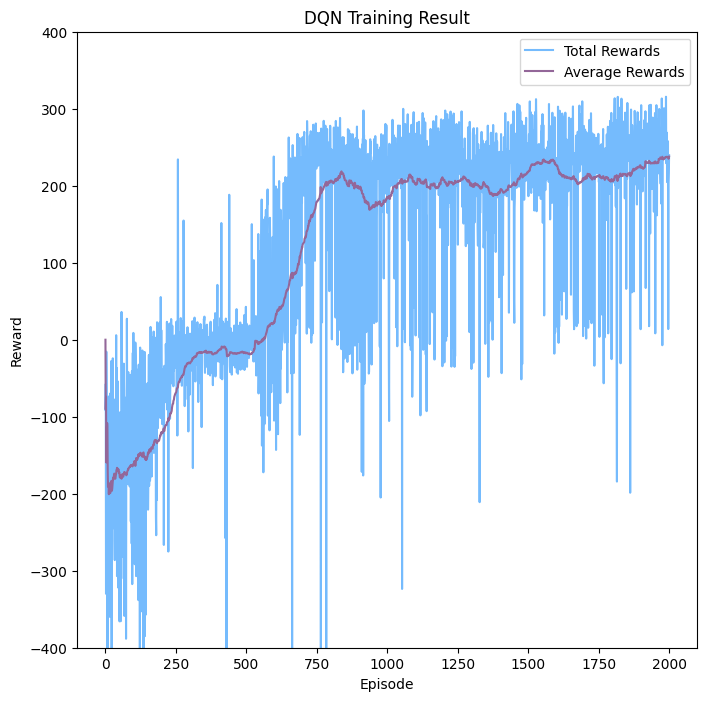

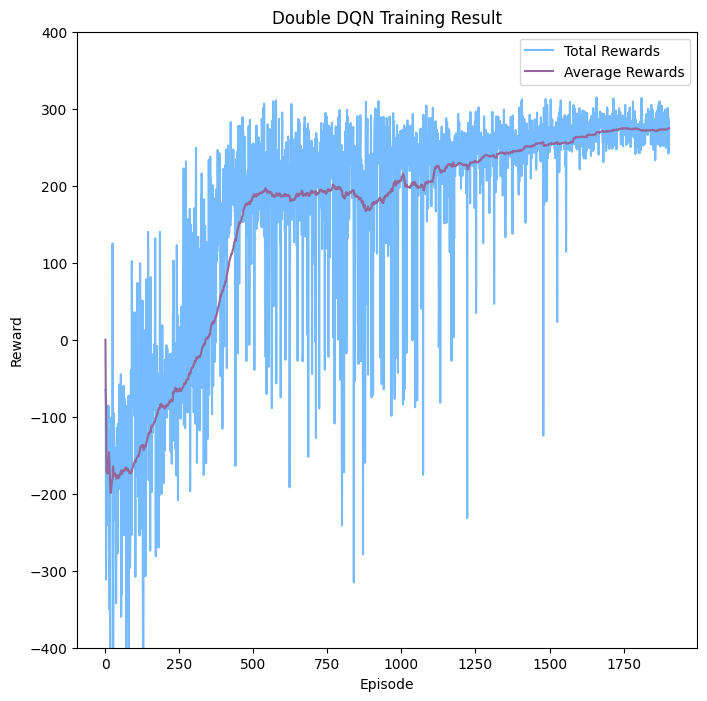

In [30]:
def draw_plot(train_data, title):
    total_rewards = np.load(train_data)
    moving_average_rewards = []
    for i in range(len(total_rewards)):
        moving_average_rewards.append(moving_average(total_rewards[:i]))
    plt.figure(figsize=(8,8))

    plt.title(title+" Training Result")
    plt.plot(total_rewards, label='Total Rewards',color='xkcd:sky blue')
    plt.plot(moving_average_rewards, color=purple_color, label='Average Rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.ylim(-400, 400)
    plt.legend()
    plt.show()
draw_plot('./DQN/DQN_231.npy',"DQN")
draw_plot('./DQN/Double_DQN_275.npy',"Double DQN")




In [ ]:
plt.xlim([-300, 500])  # Set the range of the x-axis
DQN_test_path = ''
Double_DQN_test_path = 'DQN/DDQN_275'
test_number = 1000


with open(f'{DQN_test_path}.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['test_total_rewards']
test_final_rewards = data['test_final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = test_final_rewards.count(100) / test_number *100
total_rewards.plot(kind="kde", label=f"DQN ({success_rate}%)",legend=True)
with open(f'{Double_DQN_test_path}.pkl', 'rb') as f:
    data = pickle.load(f)
test_total_rewards = data['total_rewards']
test_final_rewards = data['final_rewards']
total_rewards = pd.Series(test_total_rewards, name="Total Rewards")
success_rate = test_final_rewards.count(100) / test_number *100
total_rewards.plot(kind="kde", label=f"Double DQN ({success_rate}%)",title=f"Value-based Test Results ({test_number} Games)",legend=True)

plt.show()